#DACademy Assessment Part B
<p>This assessment is in two parts: Part A and Part B. You should answer
ALL of question 1-15 in Part A and a coding assignment in Part B.</p> 
<p>Part A carries 30 marks, and the coding assignment, <b>Part B carries 70 marks.</b> You are permitted to look through any of the resources.</p> <p>All the best.</p>

<p> The dataset we will be working on today will be Tweets Sentiment Analysis on Omicron.</p>
<p>Please download the csv file called 'omicron.csv' from the assessment page before starting this assessment.</p>
<p>In this assessment, you will be asked to fill in the blanks in the cells wherever the codes are missing</p>

##Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Import Libraries

In [ ]:
#For dataframes
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#For statistics
import numpy as np
#NLP Preprocessing
!pip install pycountry
import pycountry
import re
import string
import nltk
nltk.download('all')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
#Feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
#Metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
# ML Libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Hyper parameter Tuning
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

##Loading Dataset

In [ ]:
data_omicron = pd.read_csv('/content/drive/My Drive/omicron.csv')

##Inspecting Dataset

In [ ]:
data_omicron.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1465693385088323591,Abaris,Hants,"Would appear on Blogger (did originally), but...",2009-09-16 14:30:32,2880,4369,26907,False,2021-11-30 14:45:08,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...",['OMICRON'],Twitter Web App,0,0,False
1,1465693062999412746,GFTs ,Lalaland,There's a field somewhere beyond all doubt and...,2019-12-28 14:29:13,165,583,21152,False,2021-11-30 14:43:52,Someone told me this in October #Omicron https...,['Omicron'],Twitter for Android,0,0,False
2,1465690116442279942,Herbie Finkle (Cozy),NaN,help me find me frens ❤️,2021-07-10 09:40:57,114,393,2339,False,2021-11-30 14:32:09,Glad to see the public schoolkids are wrapping...,['COVID'],Twitter Web App,0,1,False
3,1465689607165591552,Electrical Review,United Kingdom,Electrical Review is a monthly journal aimed a...,2009-05-21 08:32:19,20759,2321,739,False,2021-11-30 14:30:08,#Automation systems have become increasingly c...,['Automation'],Hootsuite Inc.,0,0,False
4,1465688203709464578,BingX Academy 🔑,NaN,BingX (Prev. Bingbon) is the world's top crypt...,2013-12-31 02:57:32,17134,8,31,False,2021-11-30 14:24:33,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...",NaN,Twitter Web App,2,2,False


In [ ]:
data_omicron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78168 entries, 0 to 78167
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                78168 non-null  int64 
 1   user_name         78168 non-null  object
 2   user_location     61122 non-null  object
 3   user_description  73693 non-null  object
 4   user_created      78168 non-null  object
 5   user_followers    78168 non-null  int64 
 6   user_friends      78168 non-null  int64 
 7   user_favourites   78168 non-null  int64 
 8   user_verified     78168 non-null  bool  
 9   date              78168 non-null  object
 10  text              78168 non-null  object
 11  hashtags          54673 non-null  object
 12  source            78168 non-null  object
 13  retweets          78168 non-null  int64 
 14  favorites         78168 non-null  int64 
 15  is_retweet        78168 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 8.5+ MB


In [ ]:
data_omicron.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,7.816800e+04,7.816800e+04,78168.000000,7.816800e+04,78168.000000,78168.000000
mean,1.474922e+18,1.621342e+05,1826.918215,1.828934e+04,1.869090,6.317867
std,7.954872e+15,1.124701e+06,9064.529514,5.386442e+04,21.294972,92.581616
min,1.465648e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.468108e+18,1.000000e+02,88.000000,3.700000e+02,0.000000,0.000000
50%,1.471580e+18,7.800000e+02,438.000000,2.069000e+03,0.000000,1.000000
75%,1.481682e+18,4.521000e+03,1553.000000,1.320775e+04,1.000000,2.000000
max,1.490261e+18,1.668546e+07,386228.000000,1.471907e+06,3808.000000,21790.000000


In [ ]:
#total null values
data_omicron.isnull().sum().sum()

45016

In [ ]:
pd.isnull(data_omicron).sum()

id                      0
user_name               0
user_location       17046
user_description     4475
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            23495
source                  0
retweets                0
favorites               0
is_retweet              0
dtype: int64

<b>So from a preliminary analysis of our data we can see that the train set contains 78168 rows and 16 columns. Our data contains about 3.6% of missing values with them being in 'user_location', 'user_description' and 'hashtags' columns. There are 6 numerical, 8 categorical and 2 boolean columns.</b>

##Exploratory Data Analysis

###Data Visualisation - Missing Values

####Displot

<Figure size 1440x1080 with 0 Axes>

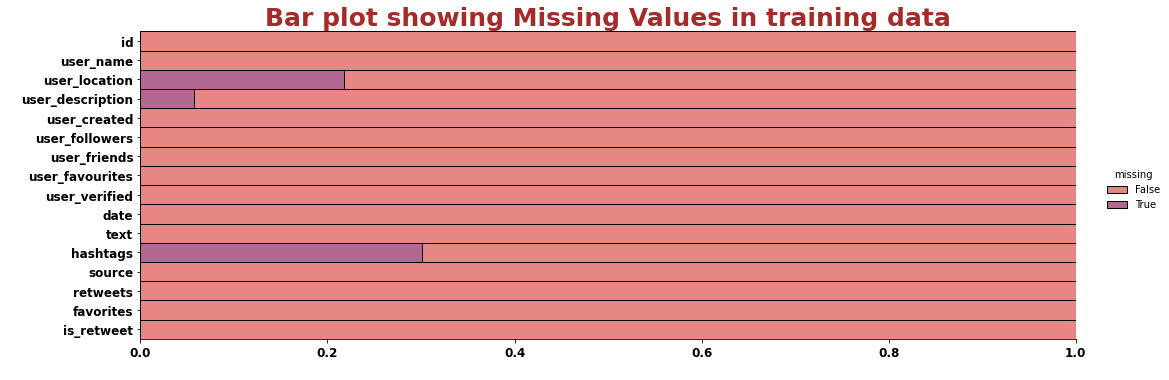

In [ ]:
plt.figure(figsize=(20,15))
sns.displot(
    data=data_omicron.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3,
    palette="flare"
)
plt.title('Bar plot showing Missing Values in training data', weight = 'bold', size = 25, color = 'brown')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'black')
plt.yticks(size = 12, weight = 'bold', color = 'black')
plt.show()

####Correlation Matrix

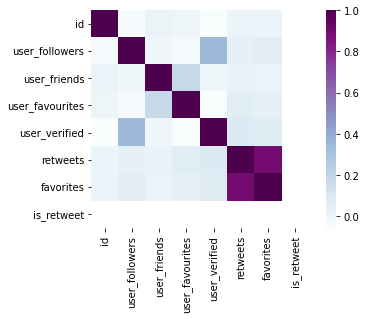

In [ ]:
sns.heatmap(data_omicron.corr(), square=True, cmap="BuPu")

<b>From this we can see that favourites and retweets are highly correlated which makes sense. Also user_verified and user_followers have a high correlation.</b>

#### Location - Data Visualisation

In [ ]:
# excluding null values (where location is not specified) in user_location 
location = [loc for loc in data_omicron['user_location'] if type(loc)==str]

# extracting country names from given location
country_name = [country.name for loc in location for country in pycountry.countries if country.name in loc]
country_name[:5]

['United Kingdom', 'Canada', 'Sri Lanka', 'India', 'Spain']

In [ ]:
type(country_name)

list

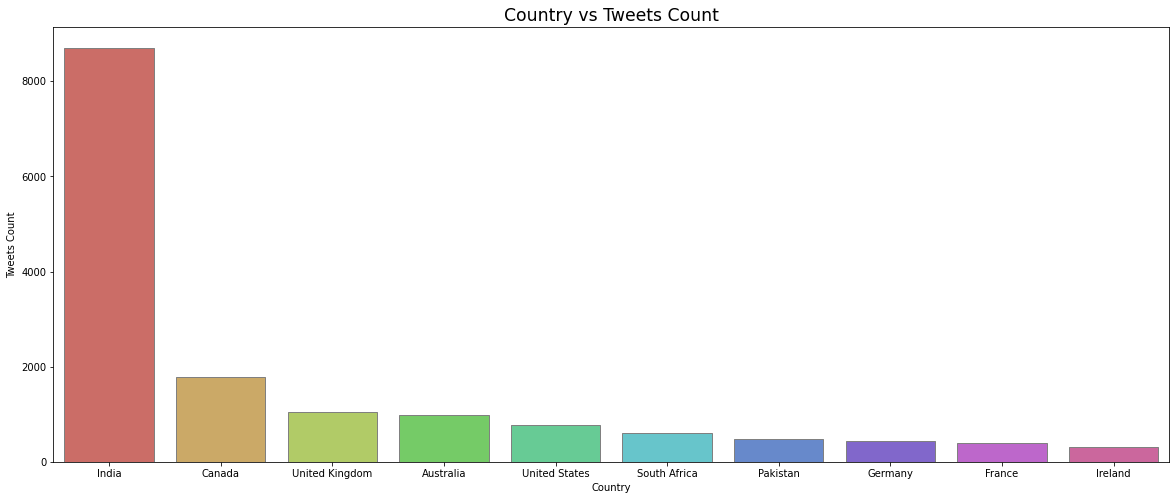

In [ ]:
# dictionary to count the number of occurances of each country
count={}
for country in country_name:
    count[country] = count.get(country, 0) + 1

# Country vs tweets count
df_country = pd.DataFrame({'Country': list(count.keys()),'Tweets Count': list(count.values())})
df_country = df_country.sort_values(by = 'Tweets Count', ascending=False)#In descending order
df_country = df_country[:10] # top 10 countries

# plot the data
plt.figure(figsize=(20,8))
plt.title('Country vs Tweets Count', size='xx-large')
ax = sns.barplot(x='Country', y='Tweets Count',data=df_country, palette='hls', edgecolor='grey');
#ax.bar_label(ax.containers[0])
plt.show()

##Data Preprocessing

###Tweet Preprocessor

In [ ]:
# Setting lemmatizer variable
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [ ]:
# preprocess text
def tweet_processor(text):
    
    # remove new lines
    text = text.replace('\n', ' ')
    
    # remove links
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    
    # remove hashtags at the end of text
    text = re.sub('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', '',text)
    
    # remove handles
    text = re.sub('@[\w]+', '',text)
    
    # remove punctuations
    punc ='''.?!,:;-_—[](){}'"`~|\/@#$%^&+=*'''
    for i in text:
        if i in punc:
            text = text.replace(i, '') 
    
    # remove extra spaces
    re.sub("\s\s+", " ", text)
    
    # lower case
    text = text.strip().lower()
    
    # lemmatization
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    
    # stopword removal
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)

    
    # replace covid19 with covid
    text=text.replace('covid19','covid')
    
    return text

# remove promotional tweets (with words 'subscribe' and 'subscription')
def no_spam(text):
    if 'subscri' in text:
        text=''
    return text

In [ ]:
#Applying tweet processor
data_omicron['text'] = data_omicron['text'].apply(tweet_processor)

In [ ]:
data_omicron['text'] 

0        told id back omicron “odium medicum insensate ...
1                                     someone told october
2        glad see public schoolkids wrapping 2021 sign ...
3        automation system become increasingly complex ...
4        🟢 u think omicron fud long📈 🔴 u think omicron ...
                               ...                        
78163    growth 7d u confirmed covid case county mt   2...
78164    elek ticker symbol big big green ev car winner...
78165    yep everyone almost omicron wa vaccinated son ...
78166    elek ticker symbol big big green ev car winner...
78167    american get sicker omicron stall everything h...
Name: text, Length: 78168, dtype: object

In [ ]:
# function
def demoji(text):
    
    # frequent emojis whhich will be kept
    pattern = '😤|😡|😠|😑|🙄|🤨|😶|😱|🙀|😲|😓|😰|😢|😥|😭|😪|🤕|😔|😣|🙁|😒|😖|😕|🥴|🤒|☹️|😞|😷|🤧|😧|😨|😩|🥺|😦|😆|😀|🤭|🤩|😌|🥰|😁|😘|😂|😅|😊|😝|😙|😇'
    for word in text:    
        if re.match(pattern, word):
            continue
            
        # remove all other non ascii characters
        text=text.replace(word, re.sub('[^\x00-\x7f]','', word)).strip()
        
    return text

# apply function
data_omicron['text']= data_omicron['text'].apply(demoji)

In [ ]:
# funtion
def convert(text):
    
    # dictionary of emoji with their meaning
    d = {'😤':'frustrated','😡':'angry','😠':'angry','😱':'horrified','🙀':'shock','😲':'shock','🙄':'disapproval','🤨':'suspicion',
         '😶':'disappointment','😓':'sad','😰':'sad','😢':'sad','😥':'sad','😭':'sad','😪':'sad','🤕':'sad','😔':'sad','😣':'sad','🙁':'sad',
         '😒':'sad','😖':'sad','😕':'sad','🥴':'sad','🤒':'sad','☹️':'sad','😞':'sad','😷':'sick','🤧':'sick','😧':'sad','😨':'sad',
         '😩':'sad','🥺':'sad','😦':'sad','😫':'sad','😆':'happy','😀':'smile','🤭':'embarrassment','🤩':'exciting','🥰':'affection',
         '😁':'smile','😂':'laugh','😅':'nervousness','😊':'smile','😝':'fun','😙':'affection','😇':'blessed'}
    
    for emoji, sentiment in d.items():
        text=text.replace(emoji, sentiment)
    return text

# apply function
data_omicron['senti_text']= data_omicron['text'].apply(convert)

###Word Cloud

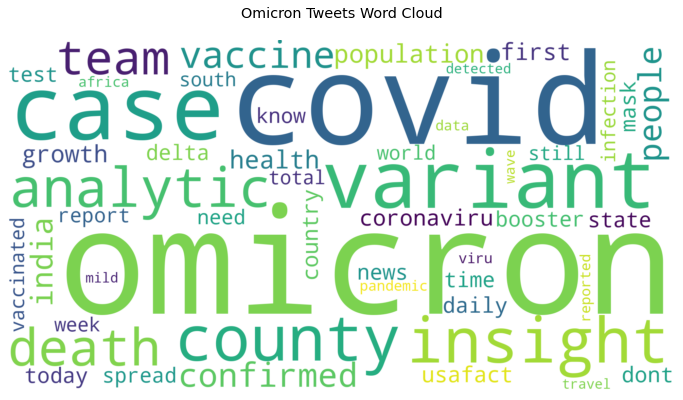

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# creating the text variable
text = " ".join(tweet for tweet in data_omicron.senti_text)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=STOPWORDS, min_word_length=4,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Omicron Tweets Word Cloud\n', size='x-large')
plt.savefig('./omicron.jpg',dpi=720) # saving the image
plt.show()

###No. of words in the text

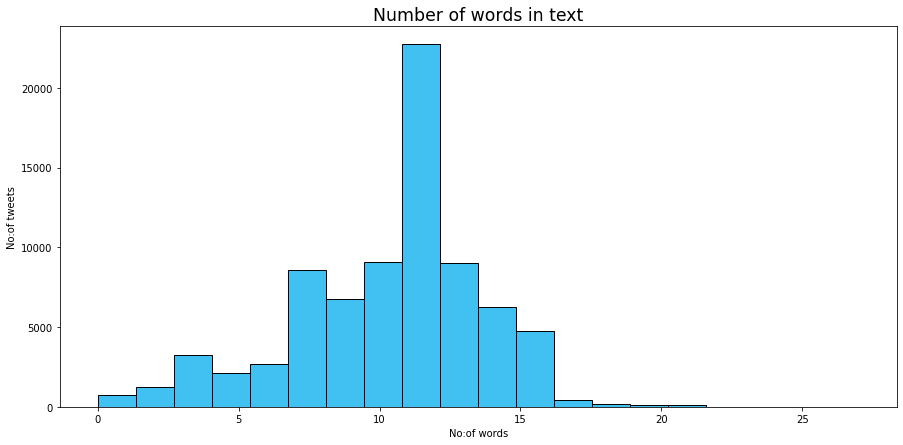

In [ ]:
# word count
word_count = [len(text.split()) for text in data_omicron.senti_text]
data_omicron['word_count'] = word_count

# plot
plt.figure(figsize=(15,7))
ax=sns.histplot(x='word_count', data=data_omicron, bins=20, color='#00acee')
#ax.bar_label(ax.containers[0])
plt.title('Number of words in text',size='xx-large')
plt.xlabel('No:of words')
plt.ylabel('No:of tweets')
plt.show()

In [ ]:
word_count = [len(text.split()) for text in data_omicron.senti_text]
data_omicron['word_count'] = word_count

# excluding text with less than 3 words
data_omicron=data_omicron[data_omicron['word_count']>2]

# excluding tweets with more than 16 words
data_omicron=data_omicron[data_omicron['word_count']<17]

##Sentiment Analysis

In [ ]:
#Subjectivity of the processed data
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
#Polarity of the processed data
#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
#To get subjectivity and polarity, import textblob
from textblob import TextBlob
#Creating columns to display subjectivity and polarity
data_omicron['Subjectivity'] = data_omicron['senti_text'].apply(getSubjectivity)
data_omicron['Polarity'] = data_omicron['senti_text'].apply(getPolarity)

In [ ]:
def getComputation(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score > 0:
        return 'Positive'
data_omicron['Computation_Analysis'] = data_omicron['Polarity'].apply(getComputation)

In [ ]:
#Creating a new dataframe sort_data to sort te polarity amd computation analysis
data_omicron_sort = data_omicron.sort_values(by=['Polarity'])

In [ ]:
data_omicron_sort.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,senti_text,word_count,Subjectivity,Polarity,Computation_Analysis
749,1465687210951430144,PenelopeWinthrop,South Florida,It's no use going back to yesterday because I ...,2014-06-04 03:19:29,3450,2232,2464,False,2021-11-30 14:20:36,...,NaN,Twitter for iPhone,0,0,False,im retweeting fox b however type reporting dis...,11,1.0,-1.0,Negative
26291,1469440036437377031,"🌬 Stay Alert, #Covid_19 Is Still In The Air 🌬",Nederland België Deutschland,De zoektocht naar oorsprong van #COVID_19 #Ori...,2020-03-22 01:58:59,130,125,9145,False,2021-12-10 22:53:00,...,NaN,Twitter Web App,0,0,False,terrible review show covid lab leak theory won...,11,1.0,-1.0,Negative
9734,1466648872030072835,Gaon Connection English,"Lucknow, India",Gaon Connection English is an initiative of Ga...,2019-12-12 08:41:52,6167,115,816,True,2021-12-03 06:01:54,...,"['COVID19', 'coronavirus', 'Omicron', 'Omicron...",Twitter for Android,0,0,False,explained known omicron worst covid variant e...,10,1.0,-1.0,Negative
51294,1479786555250073601,Selsy,"Coimbatore, India",NaN,2022-01-05 13:39:04,1,22,22,False,2022-01-08 12:06:22,...,['corona'],Twitter for Android,0,0,False,2021 wa cruel lost family name corona literall...,11,1.0,-1.0,Negative
63825,1485608911952498692,Recoon,NaN,NaN,2019-10-16 15:18:22,446,1129,10709,False,2022-01-24 13:42:20,...,"['wuhan', 'Omicron']",Twitter for Android,0,0,False,wuhan make life miserable,4,1.0,-1.0,Negative


##Measuring Baseline performance


###Multinomial Naive Bayes Classifier

####Vectorising Training Dataset

#####Feature extraction

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
tweet_text = tfidf.fit_transform(data_omicron_sort['senti_text'])

In [ ]:
tfidf.get_feature_names_out()

array(['00', '000', '00001', ..., 'zurich', 'zusammengegencorona',
       'zussmans'], dtype=object)

In [ ]:
print(tweet_text.shape)

(75389, 46771)


#####Target extraction

In [ ]:
target_lb = LabelBinarizer()

In [ ]:
targets=target_lb.fit_transform(data_omicron_sort['Computation_Analysis'])

In [ ]:
print(targets.shape)

(75389, 3)


In [ ]:
target_labels = np.argmax(targets, axis=1)

####Training model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweet_text, target_labels, test_size=0.2, random_state=42)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
##Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(X_test)
print(mnb_tfidf_predict)

[1 2 2 ... 2 1 2]


In [ ]:
#Accuracy score 
mnb_acc_score = accuracy_score(y_test,mnb_tfidf_predict)
print("mnb_acc_score : {:.2f}%".format(mnb_acc_score*100))

mnb_acc_score : 78.90%


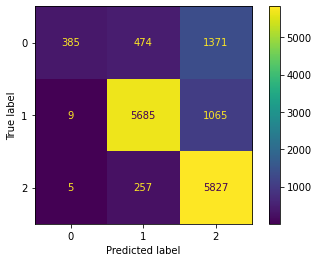

In [ ]:
cm_mnb = confusion_matrix(y_test, mnb_tfidf_predict, labels=mnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mnb, display_labels=mnb.classes_)
disp.plot()

###Hyper Parameter Tuning

In [ ]:
param_grid = {
    "gamma": [0.1, 1.0, 10, 100],
    "C": [0.1, 1.0, 10, 100]
}

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print('Best parameter:', grid_search.best_params_)

In [ ]:
# Predicting target based on test feature
y_pred = grid_search.predict(X_test)

In [ ]:
grid_search.cv_results_

In [ ]:
#Calculating Accuracy
svm_param_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:2f}%".format(svm_param_acc*100))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

##Comparing against Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr_tfidf_predict=lr.predict(X_test)
print(lr_tfidf_predict)

In [ ]:
#Accuracy score 
lr_acc_score = accuracy_score(y_test,lr_tfidf_predict)
print("lr_acc_score : {:.2f}%".format(lr_acc_score*100))

In [ ]:
cm_lr = confusion_matrix(y_test, lr_tfidf_predict, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)
disp.plot()

##Comparing against SVC

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
svm_tfidf_predict=svm.predict(X_test)
print(svm_tfidf_predict)

In [ ]:
#Accuracy score 
svm_acc_score = accuracy_score(y_test,svm_tfidf_predict)
print("svm_acc_score : {:.2f}%".format(svm_acc_score*100))

In [ ]:
cm_svm = confusion_matrix(y_test, svm_tfidf_predict, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp.plot()